# Lab 5 Question 1


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

In [2]:
base = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series'
confirmed = base+'/time_series_covid19_confirmed_global.csv'
deaths = base+'/time_series_covid19_deaths_global.csv'
recovers = base+'/time_series_covid19_recovered_global.csv'
# readin the data
recov = pd.read_csv(recovers)
death = pd.read_csv(deaths)
confi = pd.read_csv(confirmed)

In [3]:
def clean_data(df):
    ## Treating the missing values
    df['Province/State']=df['Province/State'].fillna('Missing')
    df['Lat'] = df['Lat'].fillna(0)
    df['Long'] = df['Long'].fillna(0)
    return df

pd.isnull(recov).sum() # to show the missing values
## Treating the missing values
recov = clean_data(recov)
pd.isnull(recov).sum() # now no missing values
recov.describe()
## you can call this function for the remaining 2 dataframes

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,...,274.0,274.0,274.0,274.0,274.0,274.0,274.0,274.0,274.0,274.0
mean,18.251387,27.226250,0.109489,0.116788,0.142336,0.153285,0.204380,0.237226,0.394161,0.463504,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,25.419588,75.663033,1.695410,1.699238,1.886378,1.949511,2.568159,2.761311,4.866508,5.352804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,-71.949900,-178.116500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3.865825,-9.629825,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,19.083550,23.614150,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,39.046575,95.985700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,71.706900,178.065000,28.000000,28.000000,31.000000,32.000000,42.000000,45.000000,80.000000,88.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Question 2

In [4]:
# Grouping
grouped_conf = confi.groupby(by=['Country/Region']).sum()
grouped_deat = death.groupby(by=['Country/Region']).sum()
grouped_recov = recov.groupby(by=['Country/Region']).sum()
sorted_grouped_deat = grouped_deat.sort_values(by=death.columns[-1], ascending=False)
sorted_grouped_deat.head(10)

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,40.000000,-100.000000,0,0,0,0,0,0,0,...,1119917,1120897,1121658,1122165,1122172,1122134,1122181,1122516,1123246,1123836
Brazil,0,-14.235000,-51.925300,0,0,0,0,0,0,0,...,699087,699197,699197,699276,699276,699276,699276,699276,699276,699276
India,0,20.593684,78.962880,0,0,0,0,0,0,0,...,530772,530772,530772,530775,530775,530775,530775,530775,530776,530779
Russia,0,61.524010,105.318756,0,0,0,0,0,0,0,...,388126,388163,388201,388240,388278,388320,388355,388396,388440,388478
Mexico,0,23.634500,-102.552800,0,0,0,0,0,0,0,...,332988,333038,333038,333038,333096,333100,333100,333136,333170,333188
United Kingdom,AnguillaBermudaBritish Virgin IslandsCayman Is...,336.368394,-630.330056,0,0,0,0,0,0,0,...,220721,220721,220721,220721,220721,220721,220721,220721,220721,220721
Peru,0,-9.190000,-75.015200,0,0,0,0,0,0,0,...,219439,219448,219478,219485,219493,219493,219513,219513,219539,219539
Italy,0,41.871940,12.567380,0,0,0,0,0,0,0,...,188094,188094,188094,188322,188322,188322,188322,188322,188322,188322
Germany,0,51.165691,10.451526,0,0,0,0,0,0,0,...,168086,168175,168296,168397,168397,168397,168397,168709,168808,168935


In [5]:
sorted_grouped_conf = grouped_conf.sort_values(by=confi.columns[-1], ascending=False)
sorted_grouped_conf.head(10)

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,40.000000,-100.000000,1,1,2,2,5,5,5,...,103443455,103533872,103589757,103648690,103650837,103646975,103655539,103690910,103755771,103802702
India,0,20.593684,78.962880,0,0,0,0,0,0,0,...,44687837,44688105,44688388,44688722,44689046,44689327,44689593,44689919,44690298,44690738
France,French GuianaFrench PolynesiaGuadeloupeMartini...,77.103595,-118.075614,0,0,2,3,3,3,4,...,39827175,39831700,39835896,39839090,39839090,39839090,39847236,39854299,39860410,39866718
Germany,0,51.165691,10.451526,0,0,0,0,0,1,4,...,38168908,38189954,38202571,38210850,38210850,38210851,38210851,38231610,38241231,38249060
Brazil,0,-14.235000,-51.925300,0,0,0,0,0,0,0,...,37052936,37063464,37063464,37081209,37081209,37081209,37076053,37076053,37076053,37076053
Japan,0,36.204824,138.252924,2,2,2,2,4,4,7,...,33227230,33241180,33252686,33263208,33273639,33282370,33286633,33298799,33310604,33320438
"Korea, South",0,35.907757,127.766922,1,1,2,2,3,4,4,...,30526012,30533573,30543981,30555102,30555102,30569215,30581499,30594297,30605187,30615522
Italy,0,41.871940,12.567380,0,0,0,0,0,0,0,...,25576852,25576852,25576852,25603510,25603510,25603510,25603510,25603510,25603510,25603510
United Kingdom,AnguillaBermudaBritish Virgin IslandsCayman Is...,336.368394,-630.330056,0,0,0,0,0,0,0,...,24603373,24603450,24629830,24629840,24629840,24629840,24629840,24629846,24629922,24658705


In [6]:
sorted_grouped_recov = grouped_recov.sort_values(by=recov.columns[-1], ascending=False)
sorted_grouped_recov.head(10)

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Missing,33.939110,67.709953,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Panama,Missing,8.538000,-80.782100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Netherlands,"ArubaBonaire, Sint Eustatius and SabaCuracaoSi...",107.044200,-264.960300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
New Zealand,Cook IslandsNiueMissing,-81.191700,-154.758900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nicaragua,Missing,12.865416,-85.207229,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Niger,Missing,17.607789,8.081666,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Nigeria,Missing,9.082000,8.675300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
North Macedonia,Missing,41.608600,21.745300,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Norway,Missing,60.472000,8.468900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


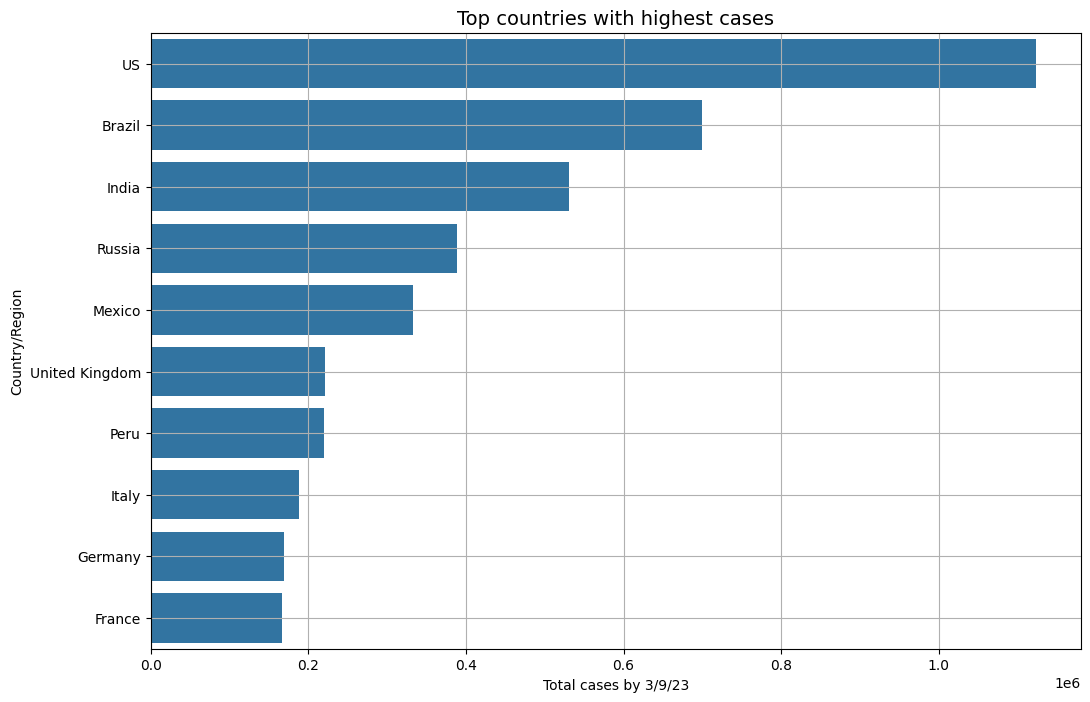

In [10]:
def bar_plot(df, nb_countries):
    last_col = df.iloc[-1]
    last_day = last_col.index[-1]
    grouped = df.groupby(by=['Country/Region']).sum()
    sorted_grouped = grouped.sort_values(by=df.columns[-1], ascending=False)
    plt.figure(figsize=(12, 8))
    plt.title('Top countries with highest cases', fontsize=14)
    sns.barplot(x = sorted_grouped[last_day].head(nb_countries),\
                y = sorted_grouped[last_day].index[:nb_countries], orient='h')
    plt.xlabel('Total cases by '+last_day)
    plt.grid()
    plt.show()
# plot top 10 countries with the highest number of deaths
bar_plot(death, 10)

# Question 3

C:\Users\micha\AppData\Local\Temp\ipykernel_25208\1450291680.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  total.index = pd.to_datetime(total.index)
C:\Users\micha\AppData\Local\Temp\ipykernel_25208\1450291680.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  total.index = pd.to_datetime(total.index)
C:\Users\micha\AppData\Local\Temp\ipykernel_25208\1450291680.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  total.index = pd.to_datetime(total.index)


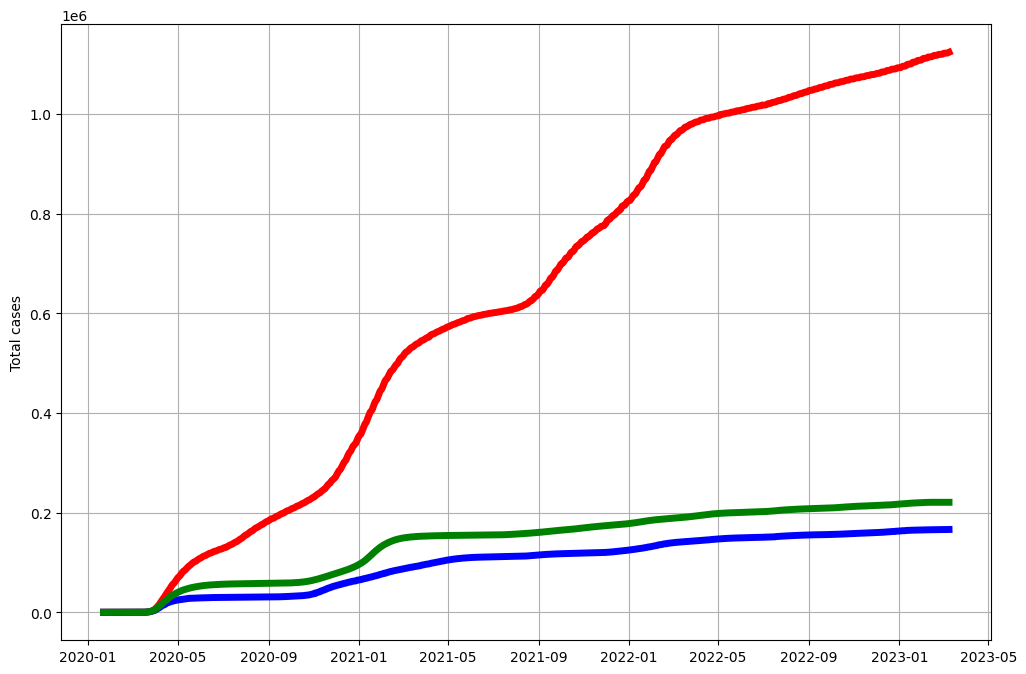

In [11]:
def get_total_death_of(name):
    df_country = confi['Country/Region']==name
    total = death[df_country].iloc[:, 4: ].apply(sum, axis=0)
    total.index = pd.to_datetime(total.index)
    return total

def line_plot_death_of(name, col):
    data = get_total_death_of(name)
    plt.figure(figsize=(12, 8))
    plt.title(name.upper()+': Total cases reported', fontsize=14)
    plt.plot(data.index, data, color=col, lw=5)
    plt.ylabel('Total cases')
    plt.grid()
    plt.show()
    
def line_plot_death_of_countries(names, cols):
    plt.figure(figsize=(12,8))
    for i in range(len(names)):
        data = get_total_death_of(names[i])
        plt.plot(data.index, data, color=cols[i], lw=5)
    plt.ylabel('Total cases')
    plt.grid()
    plt.show()
names = ['US', 'France', 'United Kingdom']
cols = ['red', 'blue', 'green']
line_plot_death_of_countries(names, cols)


# Question 4

C:\Users\micha\AppData\Local\Temp\ipykernel_25208\2035798718.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(cases.index)
C:\Users\micha\AppData\Local\Temp\ipykernel_25208\2035798718.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(cases.index)


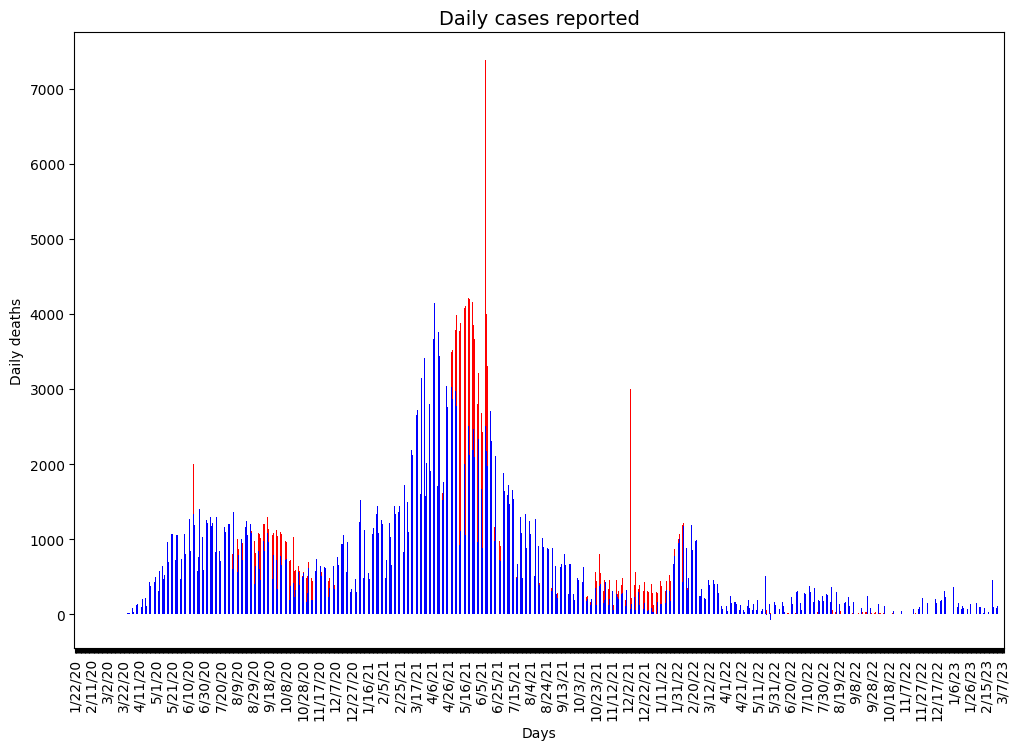

In [12]:
def get_daily_deaths_of(name):
    df_country = death['Country/Region']==name
    cases = death[df_country].iloc[:, 4: ].apply(lambda x: x.sum())
    dates = pd.to_datetime(cases.index)
    frame = {'Dates':dates, 'Cases':cases}
    df = pd.DataFrame(frame)
    df['Lag'] = df.Cases.shift(1).fillna(0)
    df['Daily Cases'] = df.Cases - df.Lag
    return df[['Dates', 'Daily Cases']]

def bar_plot_daily_deaths_of(names, cols):
    plt.figure(figsize=(12,8))
    for i in range(len(names)):
        country = names[i]
        data = get_daily_deaths_of(country)
        ax = data['Daily Cases'].plot.bar(color=cols[i])
    #The graph is annotated
    ax.set_xlabel('Days')
    ax.set_ylabel('Daily deaths')
    ax.set_title('Daily cases reported', fontsize=14)
    ##Clean up the x axis by making few labels not visible
    x = 0
    for xlabel in ax.xaxis.get_ticklabels():
        if x % 20 != 0:
            xlabel.set_visible(False)
        x = x+1
    plt.show()
        
bar_plot_daily_deaths_of(['India', 'Brazil'], ['red', 'blue'])

# Question 5

In [13]:
# Moving averages for a given window wn
def moving_averages (country, wn=7):
    df = get_daily_deaths_of(country)
    df['SMA_1'] = df['Daily Cases'].rolling(window=wn).mean()
    #df['SMA_1'] = df.iloc[:,1].rolling(window=wn).mean()
    #average window is wn
    a = np.zeros(df.shape[0])
    for i in range(0, df.shape[0]-wn+1):
        a[i+wn-1] = df['Daily Cases'][i:i+wn].mean()
    df['SMA_2'] = np.array(a)
    return df

def plot_daily_and_avg_country(name):
    df = get_daily_deaths_of(name)
    df['SMA_1'] = df['Daily Cases'].rolling(window=7).mean()
    plt.figure(figsize=(12,8))
    ax = df['SMA_1'].fillna(0).plot.line(color='red', lw=3)
    df['Daily Cases'].plot.bar(ax=ax, color='blue')
    ax.set_title(name.upper()+': Daily cases reported', fontsize=14)
    ax.set_ylabel('Daily cases')
    ##Clean up the x axis by making few labels not visible
    x = 0
    for xlabel in ax.xaxis.get_ticklabels():
        if x % 20 != 0:
            xlabel.set_visible(False)
        x = x+1
    plt.show()
print(moving_averages ('US', 28))

             Dates  Daily Cases       SMA_1       SMA_2
1/22/20 2020-01-22          0.0         NaN    0.000000
1/23/20 2020-01-23          0.0         NaN    0.000000
1/24/20 2020-01-24          0.0         NaN    0.000000
1/25/20 2020-01-25          0.0         NaN    0.000000
1/26/20 2020-01-26          0.0         NaN    0.000000
...            ...          ...         ...         ...
3/5/23  2023-03-05        -38.0  372.714286  372.714286
3/6/23  2023-03-06         47.0  367.535714  367.535714
3/7/23  2023-03-07        335.0  362.642857  362.642857
3/8/23  2023-03-08        730.0  350.607143  350.607143
3/9/23  2023-03-09        590.0  337.535714  337.535714

[1143 rows x 4 columns]


C:\Users\micha\AppData\Local\Temp\ipykernel_25208\2035798718.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(cases.index)


C:\Users\micha\AppData\Local\Temp\ipykernel_25208\2035798718.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(cases.index)


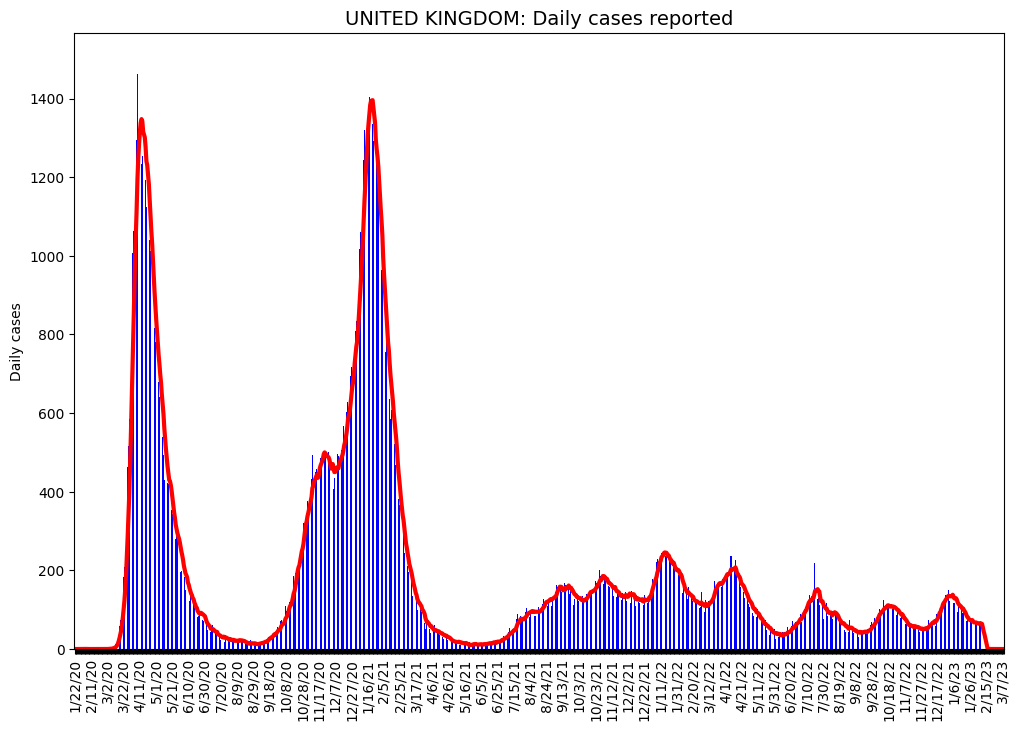

In [14]:
plot_daily_and_avg_country('United Kingdom')